In [1]:
import json
import os
import requests
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [2]:
data_root = f'/home/{os.environ["USER"]}/data/loc-newspaper/'
images_root = f'{data_root}images/'

In [3]:
## Create data directories

# if not os.path.exists(data_root):
#     os.makedirs(data_root)
    
# if not os.path.exists(images_root):
#     os.makedirs(images_root)

## Image metadata

In [41]:
## Download image metadata

mdata_path = f'{data_root}img_metadata.json'
url = 'http://beyondwords.labs.loc.gov/data'

if not os.path.exists(mdata_path):
    r = requests.get(url, stream=True)
    with open(mdata_path, 'wb') as f:
        for chunk in r.iter_content(): 
            if chunk:
                f.write(chunk)

In [42]:
## Load image metadata
with open(mdata_path, encoding='utf-8') as f:
    mdata = json.load(f)['data']

In [43]:
# Show a couple of data entries
mdata[:2]

[{'id': '5be19dee6dc35800010027c0',
  'location': {'standard': 'http://s3.amazonaws.com/ndnp-jpeg-surrogates/whi_elizabeth_ver01/data/sn85040720/00271769581/1917070901/0089.jpg'},
  'region': {'toolName': 'rectangleTool',
   'color': '#fe0000',
   'x': 2314.10668174792,
   'y': 1236.5024818316315,
   'width': 983.8836748495746,
   'height': 2167.203274608128,
   'label': 'Illustration/Photo'},
  'width': 7532,
  'height': 10017,
  'meta_data': {'set_key': 'http://chroniclingamerica.loc.gov/lccn/sn85040720/1917-07-09/ed-1/seq-1/',
   'subject_url': 'http://chroniclingamerica.loc.gov/lccn/sn85040720/1917-07-09/ed-1/seq-1/',
   'subject_description': 'The Watertown news. July 09, 1917. Page 1',
   'resize': '1.000000',
   'alto': 'http://s3.amazonaws.com/ndnp-batches/whi_elizabeth_ver01/data/sn85040720/00271769581/1917070901/0089.xml'},
  'data': {'caption': 'KING OF SAXONY\nThe Saxon soldiers in the German armies are no longer fighting because of loyalty to the king of Saxony, according 

In [44]:
## Flatten metadata into dataframe
df = json_normalize(mdata, sep='_')
print(df.count())
df.head(10)

data_caption                     1308
data_category                    1301
data_creator                      470
data_task_prompt                  777
data_values                       777
height                           2092
id                               2092
location_standard                2092
meta_data_alto                   2092
meta_data_resize                 2092
meta_data_set_key                2092
meta_data_subject_description    2092
meta_data_subject_url            2092
region_color                     2092
region_height                    2092
region_label                     2092
region_toolName                  2092
region_width                     2092
region_x                         2092
region_y                         2092
width                            2092
dtype: int64


,data_caption,data_category,data_creator,data_task_prompt,data_values,height,id,location_standard,meta_data_alto,meta_data_resize,...,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width
0,KING OF SAXONY\nThe Saxon soldiers in the Germ...,Photograph,NaN,NaN,NaN,10017,5be19dee6dc35800010027c0,http://s3.amazonaws.com/ndnp-jpeg-surrogates/w...,http://s3.amazonaws.com/ndnp-batches/whi_eliza...,1.000000,...,"The Watertown news. July 09, 1917. Page 1",http://chroniclingamerica.loc.gov/lccn/sn85040...,#fe0000,2167.203275,Illustration/Photo,rectangleTool,983.883675,2314.106682,1236.502482,7532
1,BOMB OUTRAGE IN CHICAGO FEDERAL BUILDING\nScen...,Photograph,NaN,NaN,NaN,7172,5bdc99ccd6342b0001004459,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,...,"Iron County record. September 20, 1918. Page 2",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1855.406547,Illustration/Photo,rectangleTool,2135.116044,1165.452337,550.095408,5128
2,FASHION HINT\nHere is a pretty and serviceable...,Photograph,Underwood,NaN,NaN,9162,5bccec0a6dc3580001002626,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_juli...,1.000000,...,"The Ogden standard. May 15, 1918. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,3310.021316,Illustration/Photo,rectangleTool,832.382588,1079.462878,1235.567878,6672
3,Faith Necessary and Sufficient\nBy REV. B. B. ...,Photograph,NaN,NaN,NaN,10028,5bcd2bb5d6342b00010042e7,http://s3.amazonaws.com/ndnp-jpeg-surrogates/w...,http://s3.amazonaws.com/ndnp-batches/whi_eliza...,1.000000,...,"The Watertown news. July 27, 1917. Page 4",http://chroniclingamerica.loc.gov/lccn/sn85040...,#fe0000,2570.548767,Illustration/Photo,rectangleTool,985.085662,1468.877613,419.681431,7665
4,NaN,NaN,NaN,"Enter picture's caption, illustrator or photog...",[{'caption': 'Packing Blanched and Cold-Dipped...,7122,5bc504d3f5a52900010024f6,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,...,"Iron County record. July 27, 1917. Page 4",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1268.659996,Illustration/Photo,rectangleTool,1445.251556,556.646492,5530.056391,5228
5,NaN,NaN,NaN,"Enter picture's caption, illustrator or photog...","[{'caption': 'ALEX GINSBURG', 'category': 'Pho...",6137,5bc7a075d6342b00010042d3,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,548.101472,Illustration/Photo,rectangleTool,625.100041,1289.986071,1820.965220,5096
6,NaN,NaN,NaN,"Enter picture's caption, illustrator or photog...","[{'caption': 'JACOB GINSBURG', 'category': 'Ph...",6137,5bc79bcc6dc3580001002616,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,552.631236,Illustration/Photo,rectangleTool,625.100041,1267.337519,1277.393513,5096
7,NaN,NaN,NaN,"Enter picture's caption, illustrator or photog...","[{'caption': 'LOUIS GINSBURG', 'category': 'Ph...",6137,5bc79bbf536f1200010025b9,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,561.690764,Illustration/Photo,rectangleTool,620.570330,1276.396940,751.940862,5096
8,BOMB OUTRAGE IN CHICAGO FEDERAL BUILDING,Photograph,NaN,NaN,NaN,7172,5bbfd429536f120001002499,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,...,"Iron County record. September 20, 1918. Page 2",http://chroniclingamerica.loc.gov/

In [45]:
## Some attributes are one level deeper than others (under "values" attribute), so aren't then properly flattened
## Move them up to the same level as the others and re-normalize

for i, item in enumerate(mdata):
    values = item['data'].get('values')
    if values:
        mdata[i]['data'] = values[0]

df = json_normalize(mdata, sep='_')
print(df.count())
df.head(10)

data_caption                     2075
data_category                    2077
data_creator                      584
height                           2092
id                               2092
location_standard                2092
meta_data_alto                   2092
meta_data_resize                 2092
meta_data_set_key                2092
meta_data_subject_description    2092
meta_data_subject_url            2092
region_color                     2092
region_height                    2092
region_label                     2092
region_toolName                  2092
region_width                     2092
region_x                         2092
region_y                         2092
width                            2092
dtype: int64


,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_resize,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width
0,KING OF SAXONY\nThe Saxon soldiers in the Germ...,Photograph,NaN,10017,5be19dee6dc35800010027c0,http://s3.amazonaws.com/ndnp-jpeg-surrogates/w...,http://s3.amazonaws.com/ndnp-batches/whi_eliza...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85040...,"The Watertown news. July 09, 1917. Page 1",http://chroniclingamerica.loc.gov/lccn/sn85040...,#fe0000,2167.203275,Illustration/Photo,rectangleTool,983.883675,2314.106682,1236.502482,7532
1,BOMB OUTRAGE IN CHICAGO FEDERAL BUILDING\nScen...,Photograph,NaN,7172,5bdc99ccd6342b0001004459,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"Iron County record. September 20, 1918. Page 2",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1855.406547,Illustration/Photo,rectangleTool,2135.116044,1165.452337,550.095408,5128
2,FASHION HINT\nHere is a pretty and serviceable...,Photograph,Underwood,9162,5bccec0a6dc3580001002626,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_juli...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. May 15, 1918. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,3310.021316,Illustration/Photo,rectangleTool,832.382588,1079.462878,1235.567878,6672
3,Faith Necessary and Sufficient\nBy REV. B. B. ...,Photograph,NaN,10028,5bcd2bb5d6342b00010042e7,http://s3.amazonaws.com/ndnp-jpeg-surrogates/w...,http://s3.amazonaws.com/ndnp-batches/whi_eliza...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85040...,"The Watertown news. July 27, 1917. Page 4",http://chroniclingamerica.loc.gov/lccn/sn85040...,#fe0000,2570.548767,Illustration/Photo,rectangleTool,985.085662,1468.877613,419.681431,7665
4,Packing Blanched and Cold-Dipped Product Into ...,Photograph,NaN,7122,5bc504d3f5a52900010024f6,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"Iron County record. July 27, 1917. Page 4",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1268.659996,Illustration/Photo,rectangleTool,1445.251556,556.646492,5530.056391,5228
5,ALEX\nGINSBURG,Photograph,NaN,6137,5bc7a075d6342b00010042d3,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,548.101472,Illustration/Photo,rectangleTool,625.100041,1289.986071,1820.965220,5096
6,JACOB GINSBURG,Photograph,NaN,6137,5bc79bcc6dc3580001002616,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,552.631236,Illustration/Photo,rectangleTool,625.100041,1267.337519,1277.393513,5096
7,LOUIS GINSBURG,Photograph,NaN,6137,5bc79bbf536f1200010025b9,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 29, 1918. Page 3",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,561.690764,Illustration/Photo,rectangleTool,620.570330,1276.396940,751.940862,5096
8,BOMB OUTRAGE IN CHICAGO FEDERAL BUILDING,Photograph,NaN,7172,5bbfd429536f120001002499,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_cont...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"Iron County record. September 

In [46]:
## Show data types inferred by pandas

df.dtypes

data_caption                      object
data_category                     object
data_creator                      object
height                             int64
id                                object
location_standard                 object
meta_data_alto                    object
meta_data_resize                  object
meta_data_set_key                 object
meta_data_subject_description     object
meta_data_subject_url             object
region_color                      object
region_height                    float64
region_label                      object
region_toolName                   object
region_width                     float64
region_x                         float64
region_y                         float64
width                              int64
dtype: object

In [47]:
## Create an image ID by hashing the image url, unique per image not per record

import hashlib

# func to return md5 hash from a string
def hashstr(s):
    return hashlib.md5(s.encode('utf8')).hexdigest()

# apply to new column
df['img_url_hash'] = df.apply(lambda r: hashstr(r['location_standard']), axis=1)

In [48]:
## Save data as a csv
csvdata_root = f'{data_root}img_mdata.csv'
df.to_csv(csvdata_root, index=False, encoding='utf-8')

In [49]:
# Re-read data from csv and show counts
# df = pd.read_csv(csvdata_root, encoding='utf-8')
# print(df.count())
# df.head()

## Images

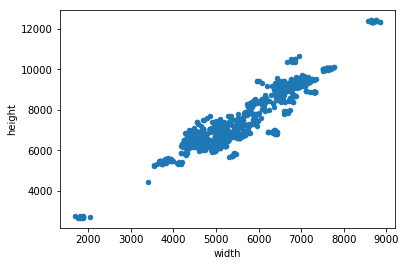

In [50]:
## Show image sizes

df.plot.scatter(x='width', y='height')

In [51]:
## Download image corresponding to each unique image hash,

# download helper function
def url_to_cvimage(url):
    r = requests.get(url)
    img_arr = np.asarray(bytearray(r.content), dtype='uint8')
    img = cv2.imdecode(img_arr, cv2.IMREAD_GRAYSCALE)
    return img

# def download_from_url(url, path):
#     r = requests.get(url, stream=True)
#     with open(path, 'wb') as f:
#         for chunk in r.iter_content(2048):
#             if chunk:
#                 f.write(chunk)

for i, row in tqdm(df.iterrows()):
    img_url = row['location_standard']
    img_url_hash = row['img_url_hash']
    img_path = f"{images_root}{row['img_url_hash']}.jpg"
    img_scale = 2048 / max(row['width'], row['height']) # scale factor for max image dimension of 2048
    if not os.path.exists(img_path):
        img = url_to_cvimage(img_url)
        if img_scale < 1:
            img = cv2.resize(img, (0,0), fx=img_scale, fy=img_scale, interpolation=cv2.INTER_AREA)
        print(f'Saving {img_path}')
        cv2.imwrite(img_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])



In [52]:
img_count = len(glob(f'{images_root}*.jpg'))
print(f'{img_count} images')

1279 images


In [53]:
df['data_category'].value_counts(dropna=False)

Photograph           1341
Illustration          418
Comics/Cartoon        223
Editorial Cartoon      72
Map                    23
NaN                    15
Name: data_category, dtype: int64

In [54]:
def labelstr(obj):
    s = ' '.join(set(obj.astype(str)))
    s = s.lower().strip()
    s = s.replace('/cartoon', '')
    s = s.replace('editorial ', 'editorial_')
    return s

labeldf = df.groupby('img_url_hash')['data_category'].apply(lambda x: labelstr(x)).to_frame().reset_index()
labeldf.columns = ['id', 'labels']

In [55]:
labeldf.head()

,id,labels
0,0016af005540341d896923265a80c3b6,map
1,002d4d8d6a00aea0eb5c0db25feef011,photograph
2,00315cd56b0932d1a2511a5a5c408b79,illustration
3,004c143ad20bc6ec664eb9368b763e20,photograph illustration
4,006aed5b166ab85682ccdd7c86f80bd0,photograph


In [56]:
labeldf.to_csv(f'{data_root}labels.csv', index=False)

## Modify and convert images

Convert images to RGB so that we can use pretrained models, also resize and stretch to square.

In [57]:
# # Stretch and shrink images to 256 x 256

# from PIL import Image

# images_mod_root = f'{data_root}images-modified-sq/'
# orig_images = glob(f'{images_root}*.jpg')
# for img_path in tqdm(orig_images):
#     fname = os.path.basename(img_path)
#     new_path = f'{images_mod_root}{fname}'
#     if os.path.exists(new_path):
#         continue
#     img = Image.open(img_path).resize((256, 256), Image.ANTIALIAS)
#     rgbimg = Image.new("RGB", img.size)
#     rgbimg.paste(img)
#     rgbimg.save(new_path)

In [19]:
# Modify images so min dimension is no greater than 299

from PIL import Image

images_mod_root = f'{data_root}images-modified/'
orig_images = glob(f'{images_root}*.jpg')
for img_path in tqdm(orig_images):
    fname = os.path.basename(img_path)
    new_path = f'{images_mod_root}{fname}'
    if os.path.exists(new_path):
        continue
    img = Image.open(img_path)
    scale = 299 / min(img.size)
    if scale < 1:
        newsize = tuple(map(lambda x: int(x * scale), img.size))
        img = img.resize(newsize, Image.ANTIALIAS)
    rgbimg = Image.new("RGB", img.size)
    rgbimg.paste(img)
    rgbimg.save(new_path)